##### Getting DAta and Performing Operations
Getting Data using pandas datareader

In [13]:
import pandas_datareader
from pandas_datareader import data
import matplotlib.pyplot as plot
import pandas as pd

In [4]:
# Getting Adjusted closed job.

netflix = data.DataReader("NFLX", start = '2010-1-1',
                         end = '2021-01-31',
                         data_source='yahoo')['Adj Close']
nf = pd.DataFrame(netflix)
nf.to_csv('netflix_20100101_20210131.csv')

In [5]:
netflix = pd.read_csv('netflix_20100101_20210131.csv')

In [6]:
netflix.head()

,Date,Adj Close
0,2010-01-04,7.640000
1,2010-01-05,7.358571
2,2010-01-06,7.617143
3,2010-01-07,7.485714
4,2010-01-08,7.614286


In [8]:
from datetime import datetime
netflix['Date']=pd.to_datetime(netflix['Date'])

In [9]:
netflix.set_index('Date',inplace=True)
netflix.head()

,Adj Close
Date,
2010-01-04,7.640000
2010-01-05,7.358571
2010-01-06,7.617143
2010-01-07,7.485714
2010-01-08,7.614286


In [11]:
# Lets check the different styles for matplotlib plots
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


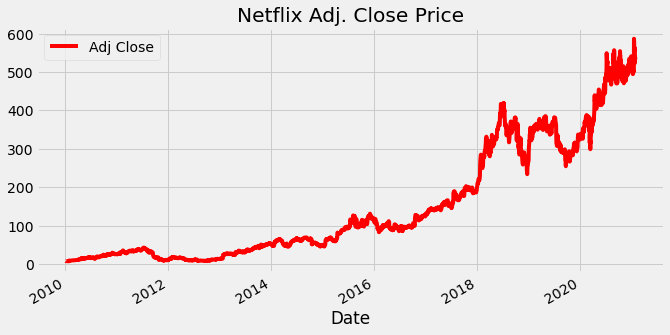

In [16]:
plot.style.use('fivethirtyeight')
netflix.plot(title='Netflix Adj. Close Price',figsize=(10,5),color= 'red')
plot.show()

<AxesSubplot:title={'center':'netflix Cumulative Returns'}, xlabel='Date'>

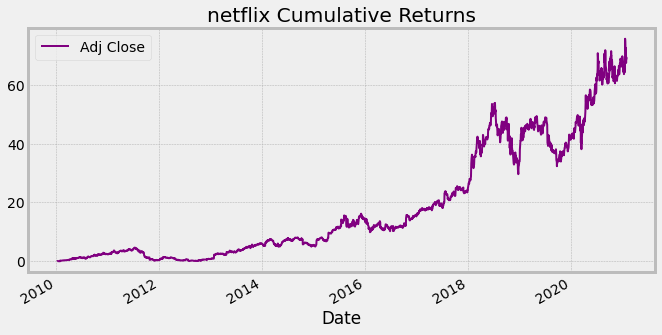

In [18]:
#Let's get our returns
returns = netflix.pct_change()

# Calculate the cumulative product
# In cumulative product, the length of returned series is same as input series and even element is equal
# to the product of current and all previous values.

plt.style.use('bmh')
((1+returns).cumprod() - 1).plot(title="netflix Cumulative Returns", figsize=(10,5),color='purple')

<AxesSubplot:xlabel='Date'>

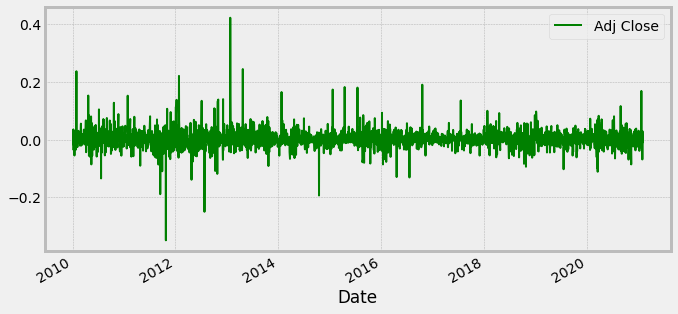

In [19]:
plt.style.use('tableau-colorblind10')
netflix.pct_change().plot(figsize=(10,5),color='green')

In [21]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key='5DNAQCM5C05VEKHV')

data, meta_Data = ts.get_intraday('NFLX')

In [22]:
data

{'2021-02-02 20:00:00': {'1. open': '549.0000',
  '2. high': '549.8900',
  '3. low': '549.0000',
  '4. close': '549.8900',
  '5. volume': '852'},
 '2021-02-02 19:15:00': {'1. open': '548.1600',
  '2. high': '548.1600',
  '3. low': '548.1600',
  '4. close': '548.1600',
  '5. volume': '118'},
 '2021-02-02 18:30:00': {'1. open': '547.4500',
  '2. high': '547.4500',
  '3. low': '547.3100',
  '4. close': '547.3100',
  '5. volume': '271'},
 '2021-02-02 18:15:00': {'1. open': '548.4400',
  '2. high': '548.4400',
  '3. low': '547.6000',
  '4. close': '547.6000',
  '5. volume': '931'},
 '2021-02-02 18:00:00': {'1. open': '549.0000',
  '2. high': '549.0000',
  '3. low': '549.0000',
  '4. close': '549.0000',
  '5. volume': '122'},
 '2021-02-02 17:30:00': {'1. open': '549.0000',
  '2. high': '549.0000',
  '3. low': '548.9600',
  '4. close': '548.9600',
  '5. volume': '466'},
 '2021-02-02 17:00:00': {'1. open': '548.1600',
  '2. high': '548.1600',
  '3. low': '548.1600',
  '4. close': '548.1600',
 

In [24]:
#5DNAQCM5C05VEKHV
from pprint import pprint
ts= TimeSeries(key='5DNAQCM5C05VEKHV',output_format='pandas')
data,meta_data =ts.get_intraday(symbol='NFLX',interval = '1min', outputsize='full')
pprint(data.head(10))

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-02-02 20:00:00   549.89   549.89  549.89    549.89      199.0
2021-02-02 19:55:00   549.50   549.50  549.50    549.50      150.0
2021-02-02 19:53:00   549.00   549.00  549.00    549.00      393.0
2021-02-02 19:48:00   549.00   549.00  549.00    549.00      110.0
2021-02-02 19:12:00   548.16   548.16  548.16    548.16      118.0
2021-02-02 18:23:00   547.45   547.45  547.31    547.31      271.0
2021-02-02 18:07:00   547.60   547.60  547.60    547.60      413.0
2021-02-02 18:06:00   548.44   548.44  548.44    548.44      518.0
2021-02-02 18:00:00   549.00   549.00  549.00    549.00      122.0
2021-02-02 17:30:00   549.00   549.00  548.96    548.96      466.0


In [27]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
cc = CryptoCurrencies(key='5DNAQCM5C05VEKHV', output_format='pandas')
data,meta = cc.get_digital_currency_daily(symbol ='doge',market='CNY')

In [28]:
pprint(data.head(10))

            1a. open (CNY)  1b. open (USD)  2a. high (CNY)  2b. high (USD)  \
date                                                                         
2021-02-04        0.240441        0.037233        0.256876        0.039778   
2021-02-03        0.202445        0.031349        0.256915        0.039784   
2021-02-02        0.224882        0.034823        0.227922        0.035294   
2021-02-01        0.238695        0.036962        0.283025        0.043827   
2021-01-31        0.182386        0.028243        0.319560        0.049484   
2021-01-30        0.296451        0.045906        0.328575        0.050880   
2021-01-29        0.235335        0.036442        0.565057        0.087500   
2021-01-28        0.047855        0.007410        0.242070        0.037485   
2021-01-27        0.053259        0.008247        0.053265        0.008248   
2021-01-26        0.053820        0.008334        0.054643        0.008462   

            3a. low (CNY)  3b. low (USD)  4a. close (CNY)  4b. 

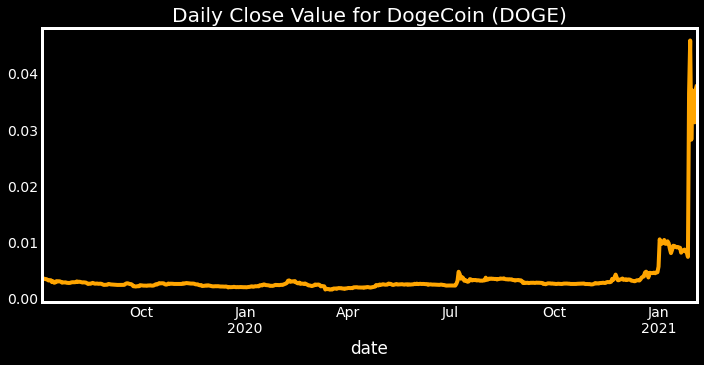

In [30]:
plt.style.use('dark_background')
data['4b. close (USD)'].plot(figsize=(10,5),linewidth=4,color='orange')
plt.tight_layout()
plt.title('Daily Close Value for DogeCoin (DOGE)')
plt.grid()
plt.show()